In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("../DataSets/clustering.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [61]:
features = ["LoanAmount","ApplicantIncome"]
X = df[features]

In [62]:
X.head()

,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333


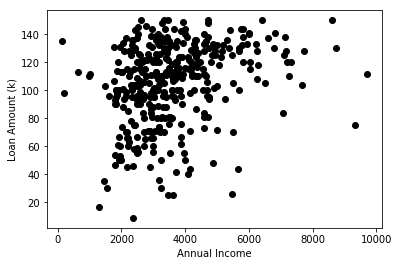

In [63]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],color="black")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount (k)")
plt.show()

In [64]:
Centroid = X.sample(n=3)

In [65]:
Centroid

,LoanAmount,ApplicantIncome
328,95.0,3400
127,127.0,3418
287,60.0,1958


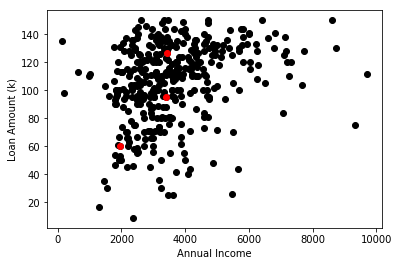

In [66]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],color="black")
plt.scatter(Centroid["ApplicantIncome"],Centroid["LoanAmount"],c="red")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount (k)")
plt.show()

In [67]:
for index1,row_c in Centroid.iterrows():
    print(row_c)

LoanAmount           95.0
ApplicantIncome    3400.0
Name: 328, dtype: float64
LoanAmount          127.0
ApplicantIncome    3418.0
Name: 127, dtype: float64
LoanAmount           60.0
ApplicantIncome    1958.0
Name: 287, dtype: float64


In [88]:
for index1,c_rows in Centroid.iterrows():
    ED = []
    for index2,x_rows in X.iterrows():
        d1 = (c_rows["ApplicantIncome"] - x_rows["ApplicantIncome"])
        d2 = (c_rows["LoanAmount"] - x_rows["LoanAmount"])
        dist = np.sqrt(d1**2 + d2**2)
        ED.append(dist)
    X[i] = ED
    i+=1

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
print(X)

     LoanAmount  ApplicantIncome            1            2            3
0         128.0             4583   684.056284  2282.547699  2100.343781
1          66.0             3000   900.319943   699.102997   517.556760
2         120.0             2583  1317.341641   285.110505   104.403065
3         141.0             6000  2100.619194  3699.536457  3517.369756
4          95.0             2333  1567.007977    36.235342   150.083310
5          70.0             3200   700.285656   899.035594   717.278886
6         109.0             2500  1400.128923   201.400099    25.495098
7         114.0             1853  2047.140689   449.444101   630.456977
8          17.0             1299  2602.024212  1003.855069  1186.248288
9         125.0             4950  1050.583171  2649.416917  2467.248265
10        100.0             3596   304.164429  1295.186859  1113.044923
11         76.0             3510   390.251201  1209.001654  1027.095419
12        133.0             4887   987.936233  2586.584814  2404

In [58]:
C = []
for index,row in X.iterrows():
    min_dist=row[1]
    pos=1
    for i in range(3):
        if row[i+1] < min_dist:
            min_dist = row[i+1]
            pos=i+1
    C.append(pos)

In [68]:
print(C)

[1, 3, 3, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 3, 2, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 3, 2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 2, 1, 3, 2, 3, 1, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 3, 3, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 2, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2, 3, 1, 3, 3, 1, 2, 3, 3, 3, 2, 1, 2, 2, 1, 2, 3, 2, 1, 1, 3, 2, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 3, 3, 3, 2, 2, 1, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 3, 1, 1, 

In [76]:
diff = 1
j = 0
while(diff!=0):
    XD=X
    i=1
    for index1,c_rows in Centroid.iterrows():
        ED =[]
        for index2,x_rows in X.iterrows():
            d1 = (c_rows["ApplicantIncome"] - x_rows["ApplicantIncome"])
            d2 = (c_rows["LoanAmount"] - x_rows["LoanAmount"])
            dist = np.sqrt(d1**2 + d2**2)
            ED.append(dist)
        X[i] = ED
        i+=1

    C = []
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(3):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"] = C
    new_Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
        
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (new_Centroids['LoanAmount'] - Centroid['LoanAmount']).sum() + (new_Centroids['ApplicantIncome'] - Centroid['ApplicantIncome']).sum()
        print(diff.sum())
    Centroid = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


662.9356193263162
443.932701198314
405.84101967755225
188.75042034296493
212.11585654878053
320.86544014225217
235.63273762230665
248.74878646215663
125.16501318300665
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


In [77]:
Centroid

,LoanAmount,ApplicantIncome
Cluster,,
1,109.756410,4033.596154
2,119.488372,6512.767442
3,97.472527,2497.972527


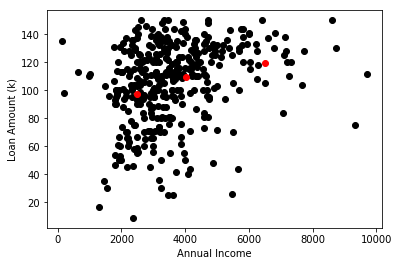

In [78]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],color="black")
plt.scatter(Centroid["ApplicantIncome"],Centroid["LoanAmount"],c="red")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount (k)")
plt.show()

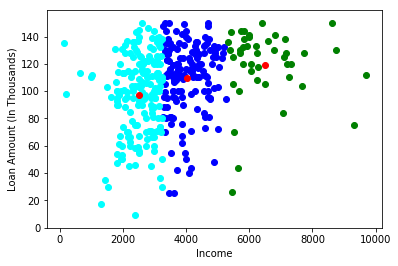

In [91]:
color=['blue','green','cyan']
for k in range(3):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroid["ApplicantIncome"],Centroid["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()